In [1]:
#Import packages
import math
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Load file
def parse_file(name):
    data = []
    f = open(name,"r")
    line = f.readline().strip()
    try:
        line_list = list(map(float, [x for x in line.split(',')]))
        data.append(line_list)
    except ValueError:
        print("A line "+ line +" could not be parsed")
    while(line):
        line = f.readline().strip()
        try:
            line_list = list(map(float, [x for x in line.split(',')]))
            data.append(line_list)
        except ValueError:
            print("A line "+ line +" could not be parsed")
    f.close()
    return data

 # Linear regression

A line  could not be parsed


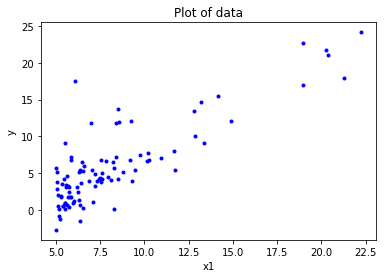

In [3]:
data = parse_file("ex1data1.mat")
X = np.array([x[0] for x in data])
#Reshapes the array (n,) to (n,1) because default is (1,n)
X = X.reshape(X.size,1)
y = np.array([x[1] for x in data])
y = y.reshape(y.size,1)

#Visualize the data.
plt.plot(X,y, "b.")
plt.title("Plot of data")
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

In [4]:
iterations = 100
learn_rate = 0.01
#Initialize theta to some values
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((X.shape[0], X.shape[1] )), X]
cost = []
powv = np.vectorize(pow)
for iteration in range(iterations):
    delta = 2/X.size * X_b.T.dot(X_b.dot(theta)-y) # Calculate delta error
    theta = theta - learn_rate*delta
    cost.append(pow((X_b.dot(theta)-y),2).mean()) #MSE

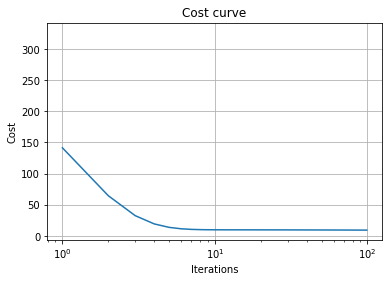

In [5]:
#Plot cost curve
plt.semilogx(range(iterations), cost)
plt.title("Cost curve")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [6]:
#Make the prediction
X_test = np.array(([5],[22.5]))
X_test_b = np.c_[np.ones((2,1)), X_test]
yHat = X_test_b.dot(theta)

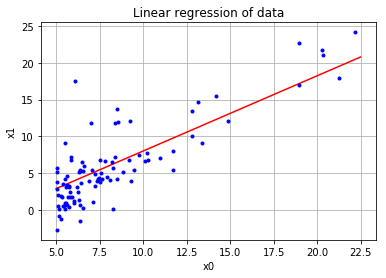

In [7]:
#Plot the data
plt.plot(X_test, yHat, "r-") #Red and line
plt.plot(X, y, 'b.') #Blue and scatter
plt.title("Linear regression of data")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.show()

 # Logistic linear regression

In [8]:
data = parse_file("ex2data1.mat")
X = np.array([[x[0],x[1]] for x in data])
y = np.array([x[2] for x in data])
#Reshapes the array (n,) to (n,1) because default is (1,n)
y = y.reshape(y.shape[0],1)

A line  could not be parsed


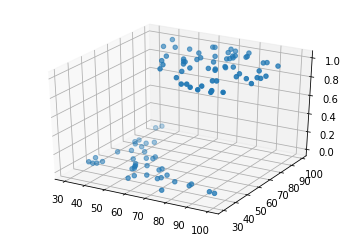

In [9]:
#Visualize the space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y)
plt.show()

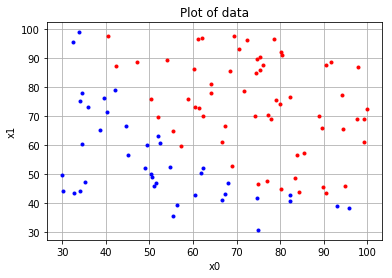

In [10]:
#Visualize the data
for i in range(X.shape[0]):
    if(y[i] == 0):
        plt.plot(X[i,0], X[i,1], 'b.') #Blue
    elif(y[i] == 1):
        plt.plot(X[i,0], X[i,1], 'r.') #Red
plt.title("Plot of data")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.show()

In [11]:
#Define helper functions
def sigmoid(x):
    return(1/(1+ math.exp(-x)))

vsigmoid = np.vectorize(sigmoid)

def logistic_cost(X_b, theta, y):
    ycost = (-y*np.log(vsigmoid(X_b.dot(theta))) - (1-y)*np.log(1-vsigmoid(X_b.dot(theta))))
    cost = ycost.mean()
    return(cost)
def threshold(p):
    if(p>0.5):
        return(1)
    elif(p<0.5):
        return(0)
vthreshold = np.vectorize(threshold)

In [12]:
#Create polynomial features
#Refrence from Sklearn docs
# poly = PolynomialFeatures(5, include_bias = False)
# X_poly = poly.fit_transform(X)

In [13]:
#Logistic regression
iterations = 500000
learn_rate = 0.0011
#Initialize theta to some values
X_b = np.c_[np.ones((X.shape[0],1)), X]
theta = np.random.randn(X_b.shape[1],1)

cost = []
for iteration in range(iterations):
    delta = 1/X.shape[0] * X_b.T.dot( vsigmoid(X_b.dot(theta)) -y ) # Calculate delta 
    theta = theta - learn_rate*delta
    cost.append(logistic_cost(X_b,theta,y))


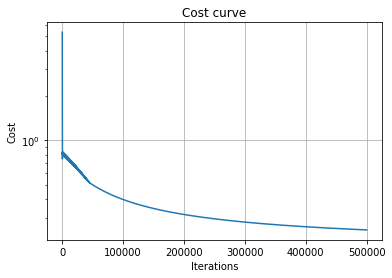

In [14]:
#Plot cost curve
plt.semilogy(range(iterations), cost)
plt.title("Cost curve")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [15]:
#Make the prediction
X_test = np.array(([X[:,0].min(0),X[:,1].min(0)],[X[:,0].max(0),X[:,1].max(0)]))
X_test_b = np.c_[np.ones((X_test.shape[0],1)), X_test]
yHat = vthreshold(vsigmoid(X_test_b.dot(theta)))
print(yHat)

[[0]
 [1]]


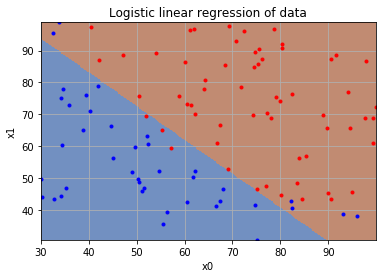

In [16]:
#Visualize the data
#Refrenced HansonML
x0 = np.linspace(X[:,0].min(0),X[:,0].max(0), num = 200)
x1 = np.linspace(X[:,1].min(0),X[:,1].max(0), num = 200)
x0, x1 = np.meshgrid(x0, x1)
X_test = np.c_[np.ones((x0.ravel().shape[0],1)),x0.ravel(), x1.ravel()]
yHat = vthreshold(vsigmoid(X_test.dot(theta)))
yHat = yHat.reshape(x0.shape)
plt.contourf(x0,x1,yHat,cmap=mpl.colors.ListedColormap(['#7290c1', '#c18b72']))
for i in range(X.shape[0]):
    if(y[i] == 0):
        plt.plot(X[i,0], X[i,1], 'b.') #Blue
    elif(y[i] == 1):
        plt.plot(X[i,0], X[i,1], 'r.') #Red
plt.title("Logistic linear regression of data")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.show()

# Polynomial L2 Regularized logistic regression

In [17]:
# class LinearRegression:
#     iterations
#     learn_rate
#     reg_lambda
#     def __init__(self, iterations=1000,learn_rate=0.01,reg_lambda=1):
#         self.iterations = iterations
#         self.learn_rate = learn_rate
#         self.reg_lambda = reg_lambda
# newLinearRegression = LinearRegression(iterations=5000)

In [18]:
data = parse_file("ex2data2.mat")
X = np.array([[x[0],x[1]] for x in data])
y = np.array([x[2] for x in data])
#Reshapes the array (n,) to (n,1) because default is (1,n)
y = y.reshape(y.shape[0],1)

A line  could not be parsed


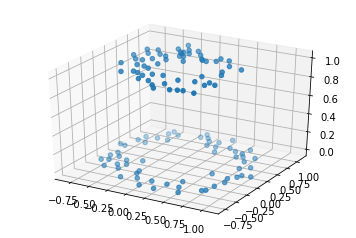

In [19]:
#Visualize the space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y)
plt.show()

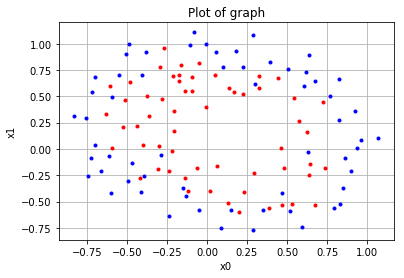

In [20]:
#Visualize the data
for i in range(X.shape[0]):
    if(y[i] == 0):
        plt.plot(X[i,0], X[i,1], 'b.') #Blue
    elif(y[i] == 1):
        plt.plot(X[i,0], X[i,1], 'r.') #Red
        
plt.title("Plot of graph")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.show()
plt.show()

In [21]:
#Create polynomial features
#Refrence from Sklearn docs
poly = PolynomialFeatures(5, include_bias = False)
X_poly = poly.fit_transform(X)


In [22]:
#Logistic regression with regularization
iterations = 5000
learn_rate = 0.1
reg_lambda = 1
#Initialize theta to some values
X_b = np.c_[np.ones((X_poly.shape[0],1)), X_poly]
theta = np.random.randn(X_b.shape[1],1)

cost = []
for iteration in range(iterations):
    delta = 1/X_poly.shape[0] * X_b.T.dot( vsigmoid(X_b.dot(theta)) -y ) # Calculate delta 
    theta = theta - learn_rate*(delta + (reg_lambda/X_poly.shape[0]) * theta) #Theta is regularized.
    cost.append(logistic_cost(X_b,theta,y))


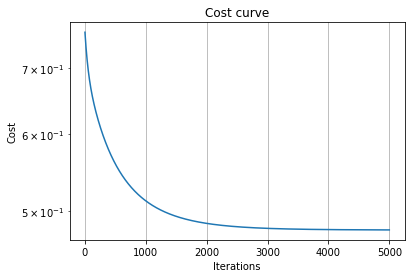

In [23]:
#Plot cost curve
plt.semilogy(range(iterations), cost)
plt.title("Cost curve")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [24]:
x0 = np.linspace(int(X[:,0].min(0)),int(X[:,0].max(0)+1))
x1 = np.linspace(int(X[:,1].min(0)),int(X[:,1].max(0)+1))

x0, x1 = np.meshgrid(x0, x1)
X_test = np.c_[np.ones((x0.ravel().shape[0],1)),x0.ravel(), x1.ravel()]
print(X_test.shape)

(2500, 3)


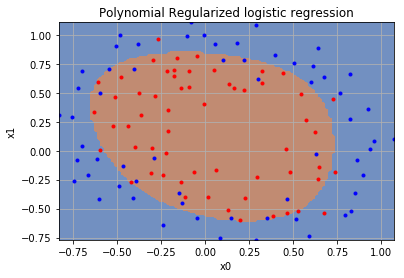

In [25]:
x0 = np.linspace(X[:,0].min(0),X[:,0].max(0), num = 100)
x1 = np.linspace(X[:,1].min(0),X[:,1].max(0), num = 100)
x0, x1 = np.meshgrid(x0, x1)
X_test = np.c_[x0.ravel(), x1.ravel()]
poly = PolynomialFeatures(5, include_bias = False)
X_test = poly.fit_transform(np.c_[x0.ravel(),x1.ravel()])
X_test = np.c_[np.ones((x0.ravel().shape[0],1)),X_test]

yHat = vthreshold(vsigmoid(X_test.dot(theta)))
yHat = yHat.reshape(x0.shape)

plt.contourf(x0,x1,yHat,cmap=mpl.colors.ListedColormap(['#7290c1', '#c18b72']))

#Visualize the data
for i in range(X.shape[0]):
    if(y[i] == 0):
        plt.plot(X[i,0], X[i,1], 'b.') #Blue
    elif(y[i] == 1):
        plt.plot(X[i,0], X[i,1], 'r.') #Red
plt.title("Polynomial Regularized logistic regression")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.show()